In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## creating a random dataset with 1000 rows

from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=3, random_state=27)

In [3]:
X = np.array([i[0] for i in X])

In [4]:
X

array([ 0.22340565,  1.01894543,  0.20824474, -2.08951967,  0.07863711,
       -0.53045651,  0.71517115,  1.52675315, -0.14442613, -0.19338003,
       -0.02062256,  0.78669271, -0.16210217, -0.41765453,  2.57186778,
       -0.05419848, -0.1705928 ,  0.56275716, -0.03589005, -0.13485633,
        0.93819636,  0.57882893,  0.31887468,  0.55944866, -0.23739459,
       -2.62169056,  0.61907566, -0.76595262, -0.29124335, -1.21337474,
       -0.54585317, -0.89542115, -0.18563412, -1.11507676,  1.03305764,
        0.41991704, -1.52519648,  0.39599855,  0.27106616,  1.26286395,
       -1.27489939,  0.99682355,  1.22618323,  0.04177794,  0.82105655,
        0.32015964,  0.44251527,  0.24283197, -0.17927633,  0.4563266 ,
        0.45872878,  0.62090065, -0.56113918,  1.05667825,  0.40815849,
        0.2150255 , -0.05433942,  1.80932844,  1.28600429,  1.01305513,
       -0.55610514, -1.31881963, -0.1530605 , -0.16297557, -0.84322883,
       -0.17994834,  0.37674294, -0.51034707,  0.0815112 ,  0.05

In [5]:
y

array([  3.40181695,   4.82424438,  -1.55104261, -17.78231205,
         3.04690835,  -6.80874075,   7.53665765,   9.28003584,
        -2.59623369,  -4.80452285,   0.25762583,   2.67929874,
         3.56370316,   2.10212447,  15.83200172,  -2.65698268,
         2.48738934,  -1.27252352,   1.55167639,  -2.43875414,
         7.66844418,   2.91203547,   1.70398547,   2.58952587,
         0.42736363, -15.27770448,   3.9986881 ,  -1.39481331,
        -5.14497303,  -9.58269435,  -0.53206199,  -5.25089665,
        -0.34460424,  -2.92941189,   3.38437414,   7.36028818,
        -7.34990772,   1.30270285,  -2.35202244,   5.44858189,
        -6.86742183,   8.65777205,   8.35021151,   1.0516698 ,
         4.50955315,   2.84573909,  -0.22138781,   3.76420545,
         3.20622132,  -0.42062737,  -0.49954321,  10.48894523,
         4.12719229,   4.9454619 ,  -6.29571535,   8.2669019 ,
        -3.70449367,  10.56094551,  11.89932521,   9.45280698,
        -5.56065111,  -3.91625601,   1.65258589,  -1.90

In [6]:
df = pd.DataFrame(zip(X,y), columns=['X','y'])
df.head()

,X,y
0,0.223406,3.401817
1,1.018945,4.824244
2,0.208245,-1.551043
3,-2.089520,-17.782312
4,0.078637,3.046908


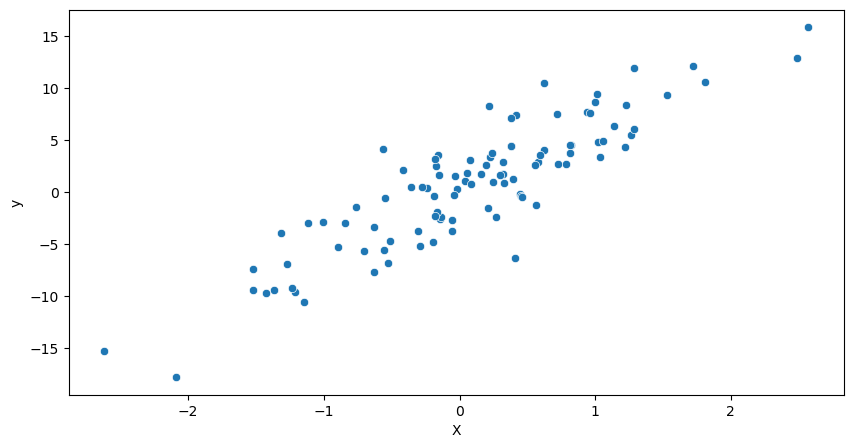

In [7]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x=df['X'], y=df['y'], ax=ax)

ax.set_xlabel('X')
ax.set_ylabel('y')

plt.show()

In [8]:
## defining a loss function

def mean_squared_error(m, c, data):
    
    total_error = 0 ##initialization
    
    for i in range(len(data)):
        
        X = data.iloc[i]['X'] ## true X
        y = data.iloc[i]['y'] ## true y
        
        y_pred = m*X + c ## predicted y
        
        squared_error = (y - y_pred)**2
        
        total_error += squared_error
        
    mean_error = total_error/float(data.shape[0])
    
    return mean_error

In [9]:
## defining a gradient descent function

def gradient_descent(m, c, data, L):
    
    m_gradient = 0 ## initialization
    c_gradient = 0 ## initialization
    
    n = len(data)
    
    for i in range(len(data)):
        
        X = data.iloc[i]['X'] ## true X
        y = data.iloc[i]['y'] ## true y
        
        y_pred = m*X + c ## predicted y
        
        m_gradient += (-2/n) * X * (y - y_pred)
        c_gradient += (-2/n) * (y - y_pred)
        
    ## update
    m = m - (L * m_gradient)
    c = c - (L * c_gradient)
        
    return m, c

In [10]:
m = 0
c = 0
mse = 0
L = 0.01
epochs = 1000

## lists to plot m, c, and error over time
m_list = list()
c_list = list()
mse_list = list()

for i in range(epochs):
    
    m, c = gradient_descent(m, c, df, L)
    mse = mean_squared_error(m, c, df)
    
    m_list.append(m)
    c_list.append(c)
    mse_list.append(mse)

Slope: 5.956141718994431


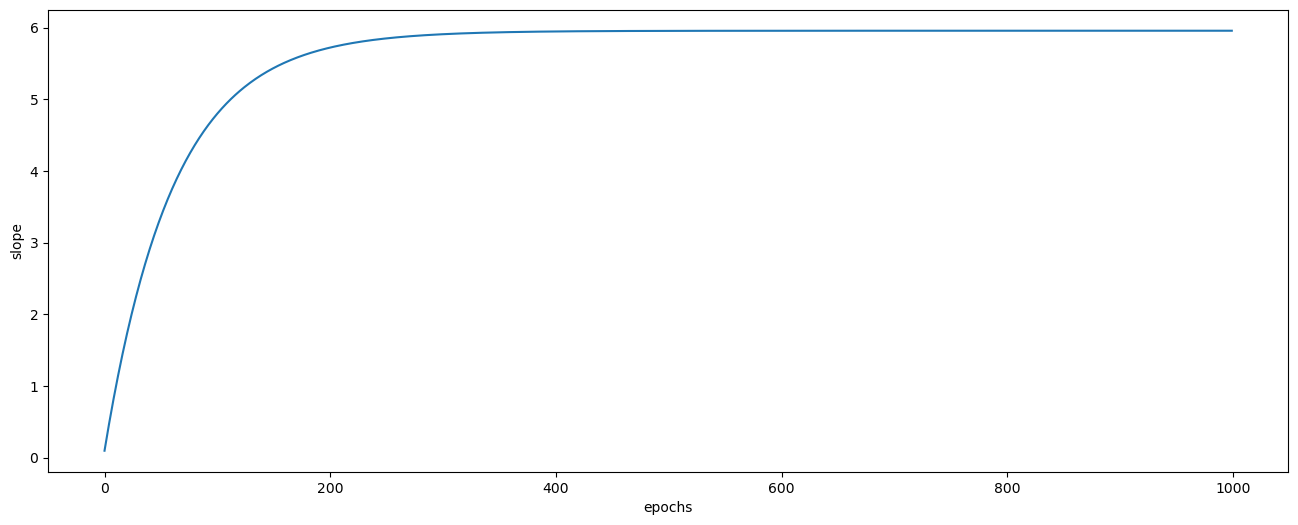

In [11]:
## plotting values of m over 1000 epochs

fig, ax = plt.subplots(figsize=(16,6))

ax.plot(m_list)
ax.set_xlabel('epochs')
ax.set_ylabel('slope')

print(f"Slope: {m}")

Slope: 0.17500494458045515


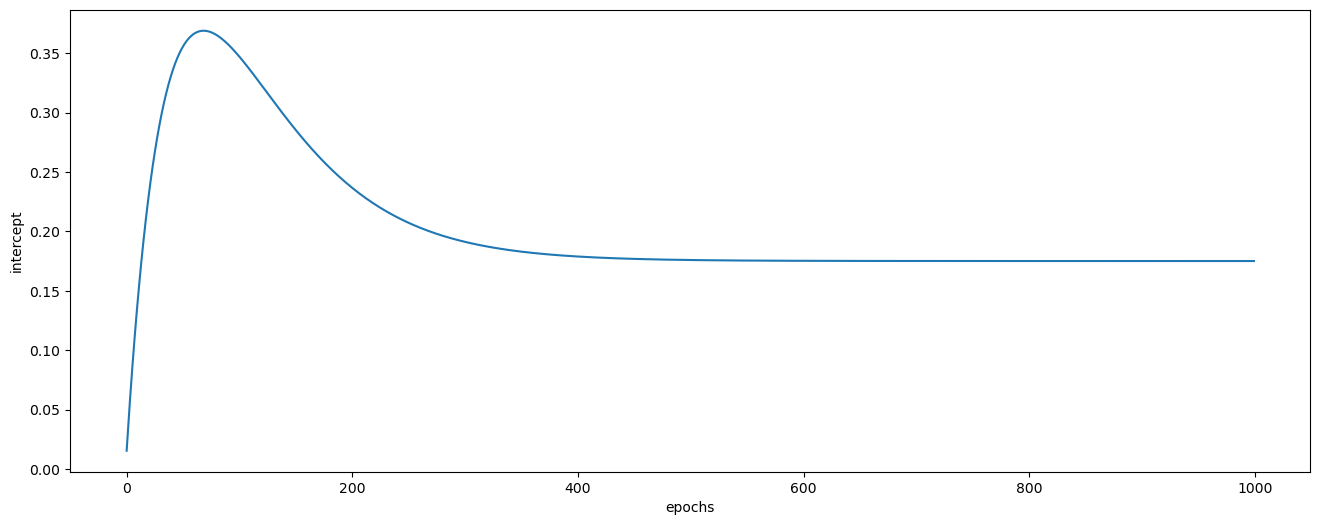

In [12]:
## plotting values of c over 1000 epochs

fig, ax = plt.subplots(figsize=(16,6))

ax.plot(c_list)
ax.set_xlabel('epochs')
ax.set_ylabel('intercept')

print(f"Slope: {c}")

Slope: 7.881260680022985


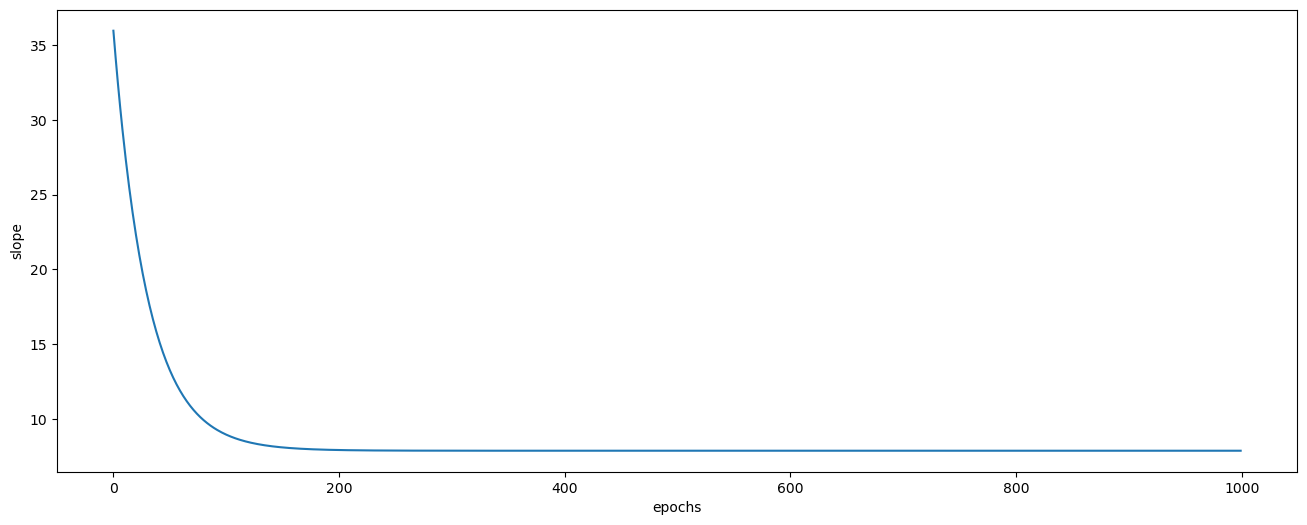

In [13]:
## plotting values of mse over 1000 epochs

fig, ax = plt.subplots(figsize=(16,6))

ax.plot(mse_list)
ax.set_xlabel('epochs')
ax.set_ylabel('slope')

print(f"Slope: {mse}")

In [14]:
## creating prediction column
df['y_pred'] = df['X'].apply(lambda X: m*X + c)

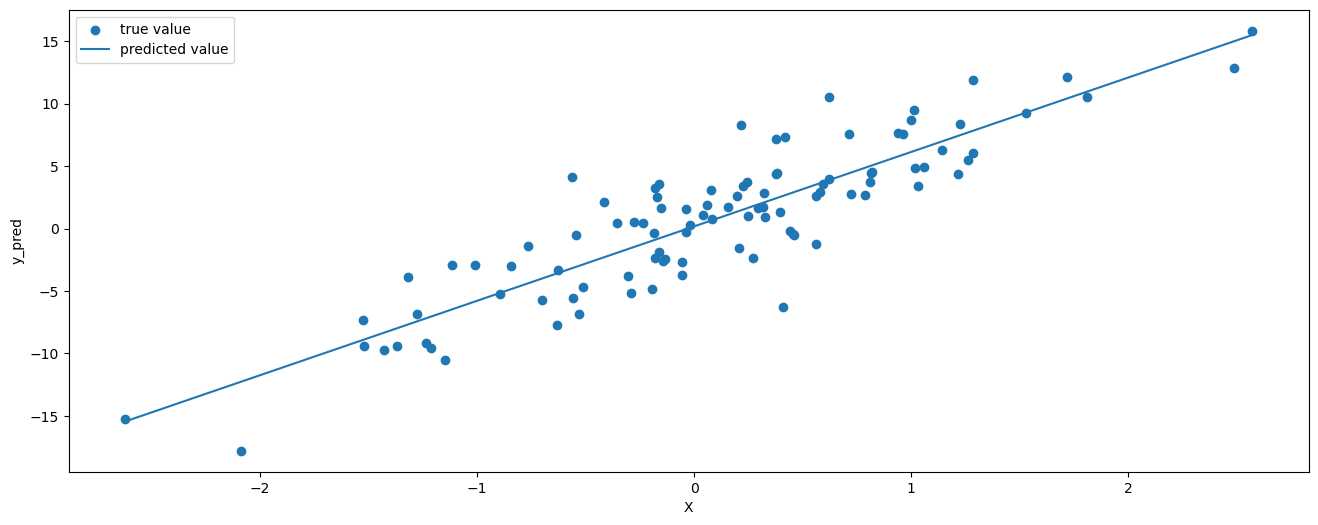

In [15]:
fig, ax = plt.subplots(figsize=(16,6))

##sns.scatterplot(x=df['X'], y=df['y'], ax=ax)
ax.scatter(x=df['X'], y=df['y'])
sns.lineplot(x=df['X'], y=df['y_pred'], ax=ax)
ax.legend(['true value', 'predicted value'])

plt.show()